In [2]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
# print(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)
clf.predict_proba(X_test)


array([[0., 1.],
       [0., 1.]])

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

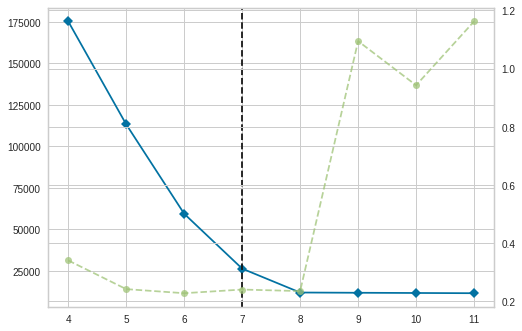

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure


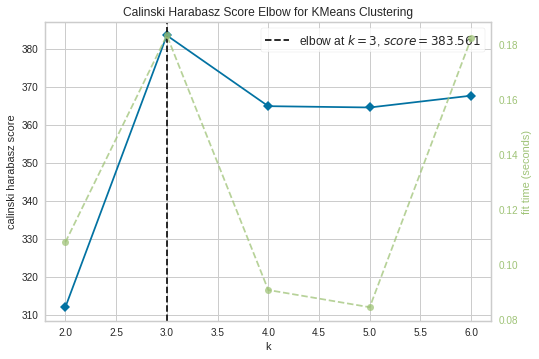

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [20]:
import src.processing as processing
import src.training as training
import src.reporting as reporting
import time
import src.utils as utils
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster.elbow import kelbow_visualizer


raw_lst = processing.get_data_paths()
names_lst = processing.get_data_names()

dataset_path = raw_lst[1]

data = arff.loadarff(dataset_path)
df = pd.DataFrame(data[0])

# Criando o conjunto de treinamento X_ e valores alvo (classes) y_
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.astype('str')

# Standarization
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

# Criando conjunto de classes
if("datatrieve" in dataset_path):
    # df_neg = df.loc[df['Faulty6_1'] == b'0']
    # df_pos = df.loc[df['Faulty6_1'] == b'1']
    target_names = np.array(['0', '1'])
else:  # cm1 is in path
    # df_neg = df.loc[df['defects'] == b'false']
    # df_pos = df.loc[df['defects'] == b'true']
    target_names = np.array(['false', 'true'])

# Criando o conjunto  X_ e valores alvo (classes) y_
X_neg = np.array([x[0] for x in zip(X,y) if x[1] == target_names[0]])
# y_neg = [x[1] for x in zip(X,y) if x[1] == target_names[0]]
X_pos = np.array([x[0] for x in zip(X,y) if x[1] == target_names[1]])
# y_pos = [x[1] for x in zip(X,y) if x[1] == target_names[1]]

# Instantiate the clustering model and visualizer
model = KMeans(random_state=1)
# print([y + 3 for y in model.labels_])
# visualizer = KElbowVisualizer(model, k=(2,7), metric='silhouette')

# visualizer.fit(X_neg)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

# visualizer = KElbowVisualizer(model, k=(2,7), metric='distortion')

# visualizer.fit(X_neg)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

visualizer = KElbowVisualizer(model, k=(2,7), metric='calinski_harabasz')

visualizer.fit(X_neg)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# print(model.cluster_centers_.shape)
# kelbow_visualizer(KMeans(random_state=1), X_neg, k=(1,10))
    
# X_new = np.concatenate((X_neg,X_pos))
# print(X_neg[:,0][:5])
# print(X_new[:,0][:5])
